In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from data
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/scrap_price.csv'

In [ ]:
df.head()

In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df['price'].describe()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df['name'].value_counts()

In [ ]:
df['name'].str.split(' ').str[0].unique()

In [ ]:
df['brand'] = df['name'].str.split(' ').str[0]

In [ ]:
df['brand'].unique()

In [ ]:
brand_mapping = {
    'maxda': 'mazda',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'Nissan': 'nissan',
    'porcshce': 'porsche'
}

df['brand'] = df['brand'].str.split(' ').str[0].replace(brand_mapping)

In [ ]:
df['brand'].unique()

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.drop('name', axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='fueltypes', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# gas has some outliers

In [ ]:
df['aspiration'].value_counts()

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='aspiration', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Plot each categorical feature vs price
for col in cat_cols:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=col, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Price")
    plt.show()

In [ ]:
df.columns

In [ ]:
import pandas as pd
import scipy.stats as stats

cat_cols = df.select_dtypes(include='object').columns
results = []

for col in cat_cols:
    groups = [df[df[col]==val]['price'] for val in df[col].unique()]
    stat, p = stats.f_oneway(*groups)
    results.append({
        "Feature": col, 
        "F-statistic": stat, 
        "p-value": p,
        "Useful": "Yes" if p < 0.05 else "No"
    })

anova_df = pd.DataFrame(results).sort_values("p-value")
anova_df

In [ ]:
# df.drop(columns=['doornumbers', 'fueltypes'], inplace=True) we will directly drop in pipe line

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
threshold = 0.85
corr_matrix = df.corr(numeric_only=True)

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
print("Highly correlated features to drop:", to_drop)

In [ ]:
df[['carlength','carwidth', 'curbweight','price']].corr()

In [ ]:
#drop carlength, curbweight, highwaympg

In [20]:
X = df.drop('price', axis=1)
y = df['price']

NameError: name 'df' is not defined

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

NameError: name 'X' is not defined

In [ ]:
num_fet = ['symboling', 'wheelbase', 'carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']
cat_fet = ['aspiration', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']

In [7]:
preprocessing = ColumnTransformer(transformers = [
    ('scaler', StandardScaler(), num_fet),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_fet)
], remainder='drop')

NameError: name 'num_fet' is not defined

In [8]:
pipe = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', LinearRegression())
])

NameError: name 'preprocessing' is not defined

In [9]:
pipe.fit(X_train, y_train)

NameError: name 'pipe' is not defined

In [10]:
y_pred =  pipe.predict(X_test)

NameError: name 'pipe' is not defined

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [12]:
r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined

In [13]:
mean_absolute_error(y_test, y_pred)

NameError: name 'y_test' is not defined

In [14]:
import numpy as np

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE: {:.2f}%".format(mape))

NameError: name 'y_test' is not defined

In [15]:

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

In [16]:
import numpy as np

# Log transform
df['log_price'] = np.log1p(df['price'])   # log(1+price)

# Distribution plot
plt.figure(figsize=(10,6))
sns.histplot(df['log_price'], bins=30, kde=True)
plt.title("Distribution of Log-Transformed Car Prices")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")
plt.show()


NameError: name 'df' is not defined

In [17]:
# Then transform only training target
y_train_log = np.log1p(y_train)

NameError: name 'y_train' is not defined

In [18]:
pipe.fit(X_train, y_train_log)

NameError: name 'pipe' is not defined

In [19]:
y_pred_log = pipe.predict(X_test)
y_pred = np.expm1(y_pred_log)  # invert back to original scale

NameError: name 'pipe' is not defined

In [107]:
r2_score(y_test, y_pred)

0.8919026590868058

In [108]:
mean_absolute_error(y_test, y_pred)

1805.4703031904392

In [131]:
from modules.modelprcheck import evaluate_model

In [132]:
evaluate_model(y_test, y_pred)

Model Evaluation Results
MAE   : 1805.47
MSE   : 8533638.74
RMSE  : 2921.24
MAPE  : 12.54%
R2    : 89.19%


{'MAE': 1805.4703031904392,
 'MSE': 8533638.738086674,
 'RMSE': np.float64(2921.2392469783563),
 'MAPE': np.float64(12.544518348566191),
 'R2': 0.8919026590868058}

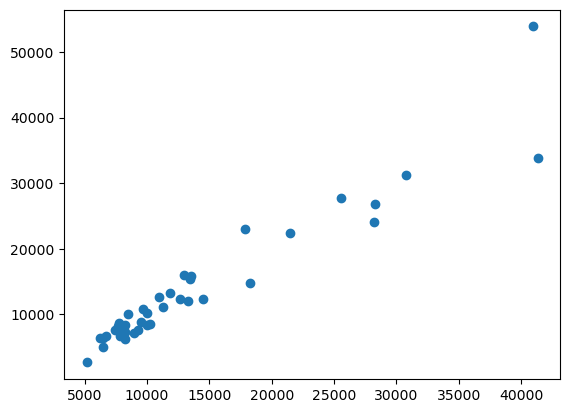

In [112]:
### Assuption when our model is performing well in LinearRegression
# 1 - plot scatter plot for the prediction
plt.scatter(y_test, y_pred)

15      -506.508390
9      -5189.848634
100      690.706961
132    -1437.600092
68      1359.225929
95      1123.665315
159      -24.454118
162     1657.768944
147     1734.424630
182     -849.540155
191     1328.151717
164      881.043747
65      3571.278618
175     -177.691623
73    -12934.316584
152      157.787790
18      2493.526296
82       308.806189
86      -135.810879
143     1600.374992
60     -1542.154960
101    -2342.589847
98      2061.015657
30      1440.481582
25        10.725861
16      7519.174468
168    -1135.857308
195    -2034.627932
97       995.985376
194    -2998.115418
67     -2130.062886
120     -142.687075
154      -79.775090
202     -905.485702
79      -487.956939
69      4021.521766
145      178.492364
55     -1768.124653
45      1770.032303
84      2186.373920
146     -110.509723
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Density'>

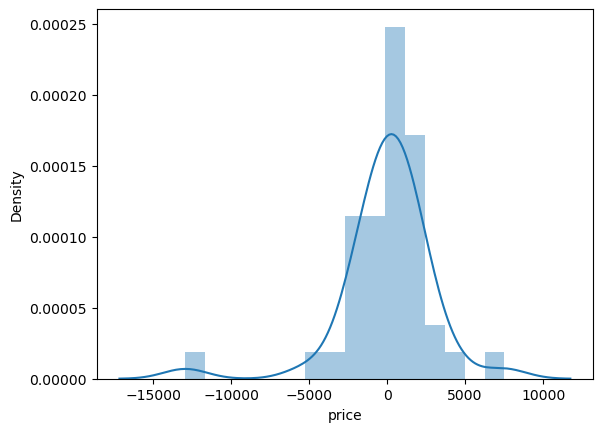

In [114]:
# 2 - residuals are nearly normaly distributed

residuals = y_test - y_pred
print(residuals)
sns.distplot(residuals, kde = True)

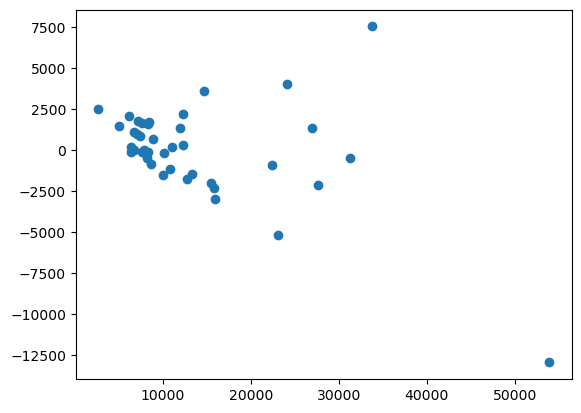

In [116]:
# 3- Scatter plot with respect to prediction and residuals -  uniform distribution
plt.scatter(y_pred,residuals)

In [133]:
from modules.lrassu import check_regression_assumptions

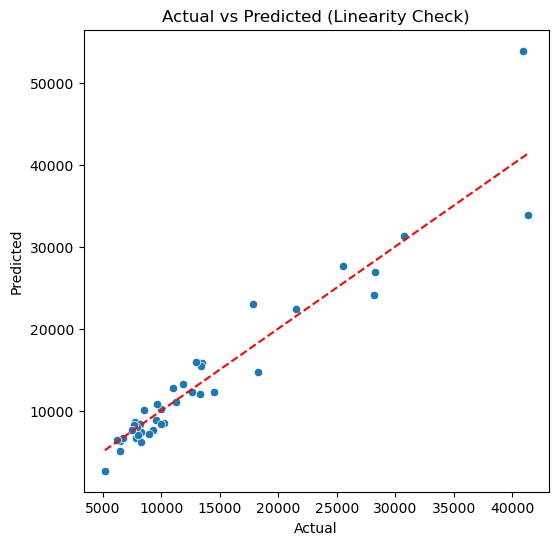

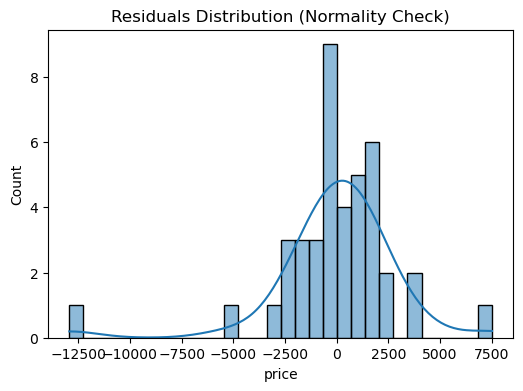

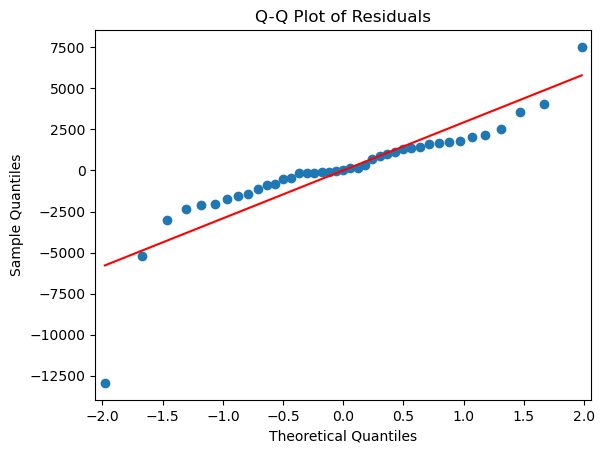

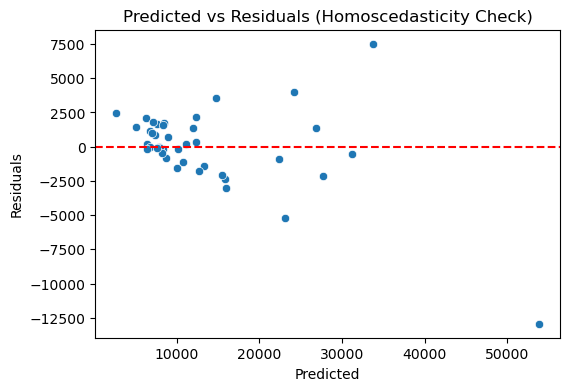

Durbin-Watson Statistic (Independence of Errors): 2.017 (Ideal ~2)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [134]:
check_regression_assumptions(X, y_test, y_pred)

In [135]:
import pickle


pickle.dump(, open('models/lr_model.pkl', 'wb'))

In [2]:
X.colums

NameError: name 'X' is not defined

In [ ]:
import streamlit

